## Decision Tree - Exercises

This notebook contains exercises concerning decision trees. 

In [292]:
import numpy as np

# attribute1: corner ({true, false})
# attribute2: blue ({true, false})
#

circle = 1
triangle = 2
rectangle = 3

A = np.array([  circle, circle, circle, circle, circle, circle, 
                triangle, triangle, triangle, 
                rectangle, rectangle, rectangle, rectangle, rectangle
                ])

B1 = np.array([ triangle, triangle, triangle,
                rectangle,rectangle,rectangle,rectangle,rectangle 
                ])

B2 = np.array([circle, circle, circle, circle, circle, circle])

C1 =  np.array([ triangle, triangle, triangle,
                circle, circle
                ])

C2 = np.array([circle, circle, circle, circle,
                rectangle, rectangle, rectangle, rectangle, rectangle])

### Exercise 1 - Entropy: 
Implement the entropy in python. Compare your implementation with your calculated values.
 
**Use the following stub for your implementation:**

```python
def entropy(Y: np.array):
    """ Compute the entropy of a given array of class-labels.
    
    Parameters
    ----------
    Y: np.array
        A one dimensional numpy array containing class labels. Class labels
        are assumed not to be one-hot encoded but categorical integer values. 

    Returns
    ----------
    Entropy of Y. 
    """
    pass
```

In [293]:
import math

def entropy(Y: np.array):
    labels = np.unique(Y)
    sumArray = []
    for label in labels:
        count = np.count_nonzero(Y == label)
        array = -(count/len(Y) * math.log2(count/len(Y)))
        sumArray.append(array)
    

    return np.sum(sumArray)


In [294]:
print(entropy(A))
print(entropy(B1))
print(entropy(B2))
print(entropy(C1))
print(entropy(C2))




1.5306189948485174
0.9544340029249649
0.0
0.9709505944546686
0.9910760598382222


### Exercise 2 - Information Gain:

Implement the conditional entropy and information gain. Compare your implementation with your calculated results. 

**Use the following stubs for your implementation:**

```python
def conditional_entropy(Sa: list):
    """ Compute the conditional entropy.

    Compute the conditional entropy for a list of numpy arrays with given class labels. Each list entry 
    is assumed to contain the class labels of a set of data that was created by splitting a training set
    of data according to an attribute.

    Parameters
    ----------
    Sa: [np.array]
        A list of one dimensional numpy arrays each containing class labels. Class labels
        are assumed not to be one-hot encoded but categorical integer values. 

    Returns
    ----------
    Entropy of Y. 
    """
    pass
```

```python
def information_gain(T : np.array, Sa : list):
    """ Compute the information gain.

    Parameters
    ----------
    T: np.array
        A one dimensional numpy array containing class labels. Class labels
        are assumed not to be one-hot encoded but categorical integer values. 

    Sa: [np.array]
        A list of one dimensional numpy arrays each containing class labels. Class labels
        are assumed not to be one-hot encoded but categorial integer values. 

    Returns
    ----------
    Bits saved when encoding Sa instaed of T. 
    """
    pass
```



In [295]:
def conditional_entropy(Sa: list):
  result = []
  total = 0
  for labels in Sa:
    total = total + len(labels)
  for labels in Sa:
    result.append(entropy(labels)* (len(labels)/total))
  return np.sum(result)

In [296]:
def information_gain(T : np.array, Sa : list):
  cond = conditional_entropy(Sa)
  ent = entropy(T)
  return ent - cond

In [297]:
print(information_gain(A,[B1,B2]))
print(information_gain(A,[C1,C2]))


0.9852281360342517
0.5467306012187071


### Exercise 3 - Gini Impurity:

Implement the Gini Impurity and compare your results with your calculations. 

**Use the following stubs for your implementation:**

```python
def gini_impurity(Y:np.array):
   """ Compute the gini impurity.

    Parameters
    ----------
    Y: np.array
        A one dimensional numpy array containing class labels. Class labels
        are assumed not to be one-hot encoded but categorical integer values. 

    Returns
    ----------
    Gini impurity of the set with labels Y.
    """
    pass
```


In [298]:
def gini_impurity(Y:np.array):
    labels = np.unique(Y)
    sumArray = []
    for label in labels:
      count = np.count_nonzero(Y == label)
      sumArray.append(math.pow(count/len(Y),2))

    return (1- np.sum(sumArray))
 

In [299]:
print(gini_impurity(A))
print(gini_impurity(B1))
print(gini_impurity(B2))
print(gini_impurity(C1))
print(gini_impurity(C2))



0.6428571428571429
0.46875
0.0
0.48
0.49382716049382713


### Exercise 4 - Decision Tree in scikit-learn:

Let's now use a full implementation of decision trees from scikit-learn. 

* Build a decision tree using **gini impurity** and a decision tree using **entropy** based on the implementation in sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 
* Interpret and compare the results by using the ```plot_tree()``` method.

In [300]:
from sklearn import tree
Y = np.array([  circle, circle, circle, circle, circle, circle, 
                triangle, triangle, triangle, 
                rectangle, rectangle, rectangle, rectangle, rectangle
            ])


# Attributes (aka Features)
# x1 = corners, x2 = blue
# Notice that sklearn does not support categorical attributes we therefore encode this
# (one-hot-encoded) by using 0 as False and 1 as True. 
#

X = np.array([[0, 1],  # circle 1
              [0, 1],  # circle 2
              [0, 0], # circle 3
              [0, 0], # circle 4
              [0, 0], # circle 5
              [0, 0], # circle 6
              [1, 1],   # triangle 1
              [1, 1],   # triangle 2
              [1, 1],   # triangle 3
              [1, 0],  # rectangle 1
              [1, 0],  # rectangle 2
              [1, 0],  # rectangle 3
              [1, 0],  # rectangle 4
              [1, 0]   # rectangle 5
            ])

def entropyPlot():
  clf = tree.DecisionTreeClassifier(criterion='entropy')
  clf = clf.fit(X, Y)
  tree.plot_tree(clf)

def giniPlot():
  gclf = tree.DecisionTreeClassifier(criterion='gini')
  gclf = gclf.fit(X, Y)
  tree.plot_tree(gclf)







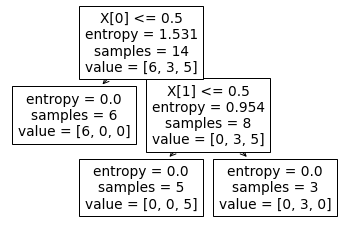

In [301]:
entropyPlot()


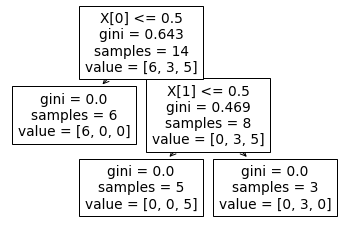

In [302]:
giniPlot()



*   die etnropy ändert sich an manchen stellen




### Exercise 5 - Experiment with Decision Trees in scikit-learn:

In this exercise it is your job to experiment with the decision tree implementation of sklearn. I provided you with a ```gen_data()``` method
which is capable of generating (random) data. Use the ```accuracy_score()``` method from sklearn.metrics for evaluation. Train a classifier for this synthetic data and try to answer the following questions:

* How does the accuracy change depending on the number of data?
* Create a seperate dataset for training and testing, what is the difference between training and test accuracy? Why is it different?
* Restrict the depth of the decision tree, what changes?
* Have a closer look on the decisions in a tree. Explain the results. (Note: You can increase the size of the plotted tree using this line of code ```plt.figure(figsize=(20,20))``` before calling the ```tree.plot_tree``` method)

In [303]:
import matplotlib.pyplot as plt

def gen_data(num_samples=10):

    std = 10
    mean = 0

    X = std * np.random.uniform(0, 1, (num_samples, 2)) + mean
    Y = np.zeros(num_samples)
    Y[0:int(num_samples/2)] = 1
 
    plt.figure()
    plt.scatter(X[0:int(num_samples/2),0], X[0:int(num_samples/2),1])
    plt.scatter(X[int(num_samples/2):-1,0], X[int(num_samples/2):-1,1])
    plt.legend(['Class-1', 'Class-2'])
    return X,Y

In [304]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def get_clf(samples=10):
  X,Y = gen_data(samples)

  X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, Y_train)

  result = clf.predict(X_test)
  print(f"accuracy_score {accuracy_score(Y_test, result)}")
  return clf

def pred_train_test(samples=10):
  X,Y = gen_data(samples)

  X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, Y_train)

  result_trainig_data = clf.predict(X_train)
  result_testing_data = clf.predict(X_test)

  print(f"accuracy_score_training {accuracy_score(Y_train, result_trainig_data)}")
  print(f"accuracy_score_testing {accuracy_score(Y_test, result_testing_data)}")

def get_clf_max_deth(samples=10, max_depth=5):
  X,Y = gen_data(samples)

  X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

  clf = tree.DecisionTreeClassifier(max_depth=max_depth)
  clf = clf.fit(X_train, Y_train)

  result = clf.predict(X_test)
  print(f"accuracy_score {accuracy_score(Y_test, result)}")
  return clf


def get_clf_with_res_and_without(samples=50, max_depth=5):
  X,Y = gen_data(samples)

  X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

  clf_max_depth = tree.DecisionTreeClassifier(max_depth=max_depth)
  clf_max_depth = clf_max_depth.fit(X_train, Y_train)

  result = clf_max_depth.predict(X_test)
  print(f"accuracy_score_with_restriction {accuracy_score(Y_test, result)}")

  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, Y_train)

  result = clf.predict(X_test)
  print(f"accuracy_score_without_restriction {accuracy_score(Y_test, result)}")

  return clf_max_depth, clf

accuracy_score 0.6666666666666666


DecisionTreeClassifier()

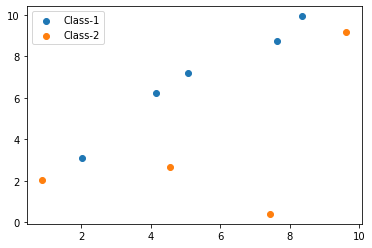

In [305]:
# For Task 1 Sampel size 10
get_clf(10)



accuracy_score 0.5066666666666667


DecisionTreeClassifier()

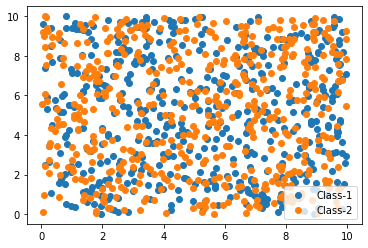

In [306]:
# For Task 1 Sampel size 1000
get_clf(1000)


accuracy_score 0.502


DecisionTreeClassifier()

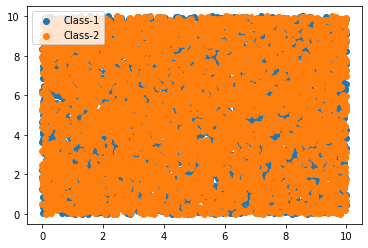

In [307]:
# For Task 1 Sampel size 10000
get_clf(10000)


accuracy_score_training 1.0
accuracy_score_testing 0.3333333333333333
accuracy_score_training 1.0
accuracy_score_testing 0.6
accuracy_score_training 1.0
accuracy_score_testing 0.5033333333333333


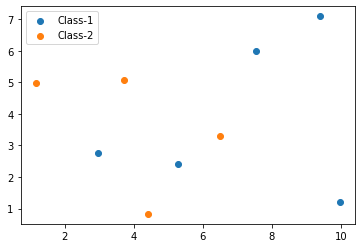

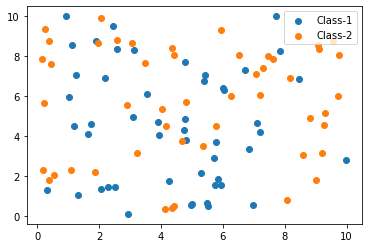

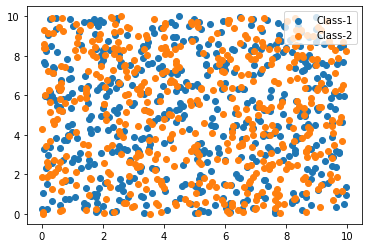

In [308]:
# For Task 2 Sample size 10 / 100 / 1000
pred_train_test(10)
pred_train_test(100)
pred_train_test(1000)



accuracy_score_with_restriction 0.5166666666666667
accuracy_score_without_restriction 0.48333333333333334
max_depth_with_restriction 5
max_depth_without_restriction 14


[Text(0.515625, 0.9666666666666667, 'X[0] <= 5.127\ngini = 0.499\nsamples = 140\nvalue = [67, 73]'),
 Text(0.3380681818181818, 0.9, 'X[0] <= 4.562\ngini = 0.47\nsamples = 77\nvalue = [29, 48]'),
 Text(0.3153409090909091, 0.8333333333333334, 'X[1] <= 5.931\ngini = 0.487\nsamples = 69\nvalue = [29, 40]'),
 Text(0.1534090909090909, 0.7666666666666667, 'X[1] <= 1.493\ngini = 0.497\nsamples = 39\nvalue = [21, 18]'),
 Text(0.09090909090909091, 0.7, 'X[0] <= 4.278\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.06818181818181818, 0.6333333333333333, 'X[1] <= 0.813\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.045454545454545456, 0.5666666666666667, 'X[0] <= 2.242\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.022727272727272728, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06818181818181818, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.09090909090909091, 0.5666666666666667, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.11363636363636363, 0.6

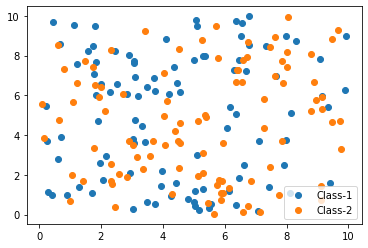

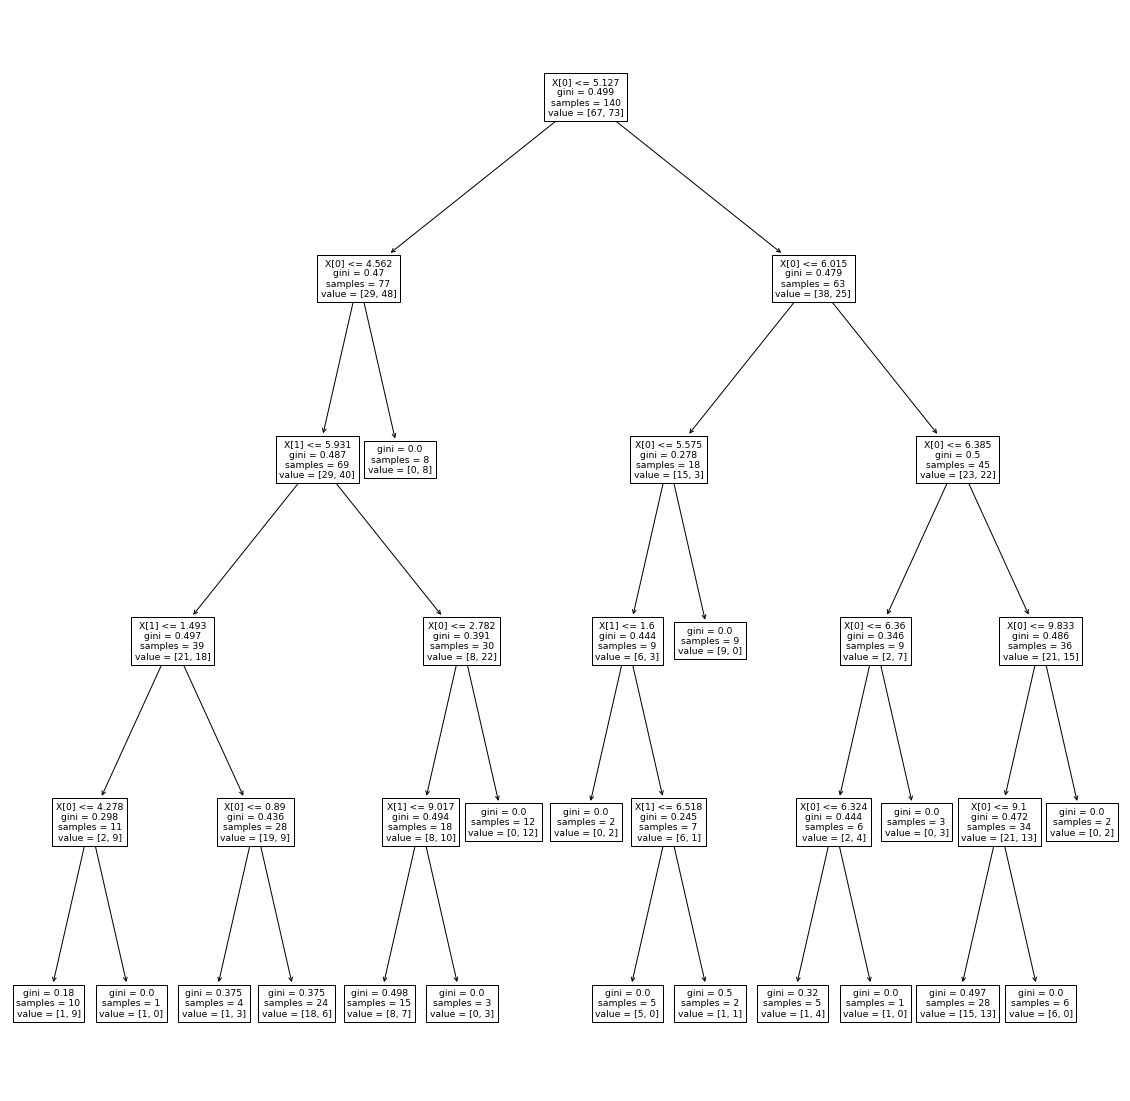

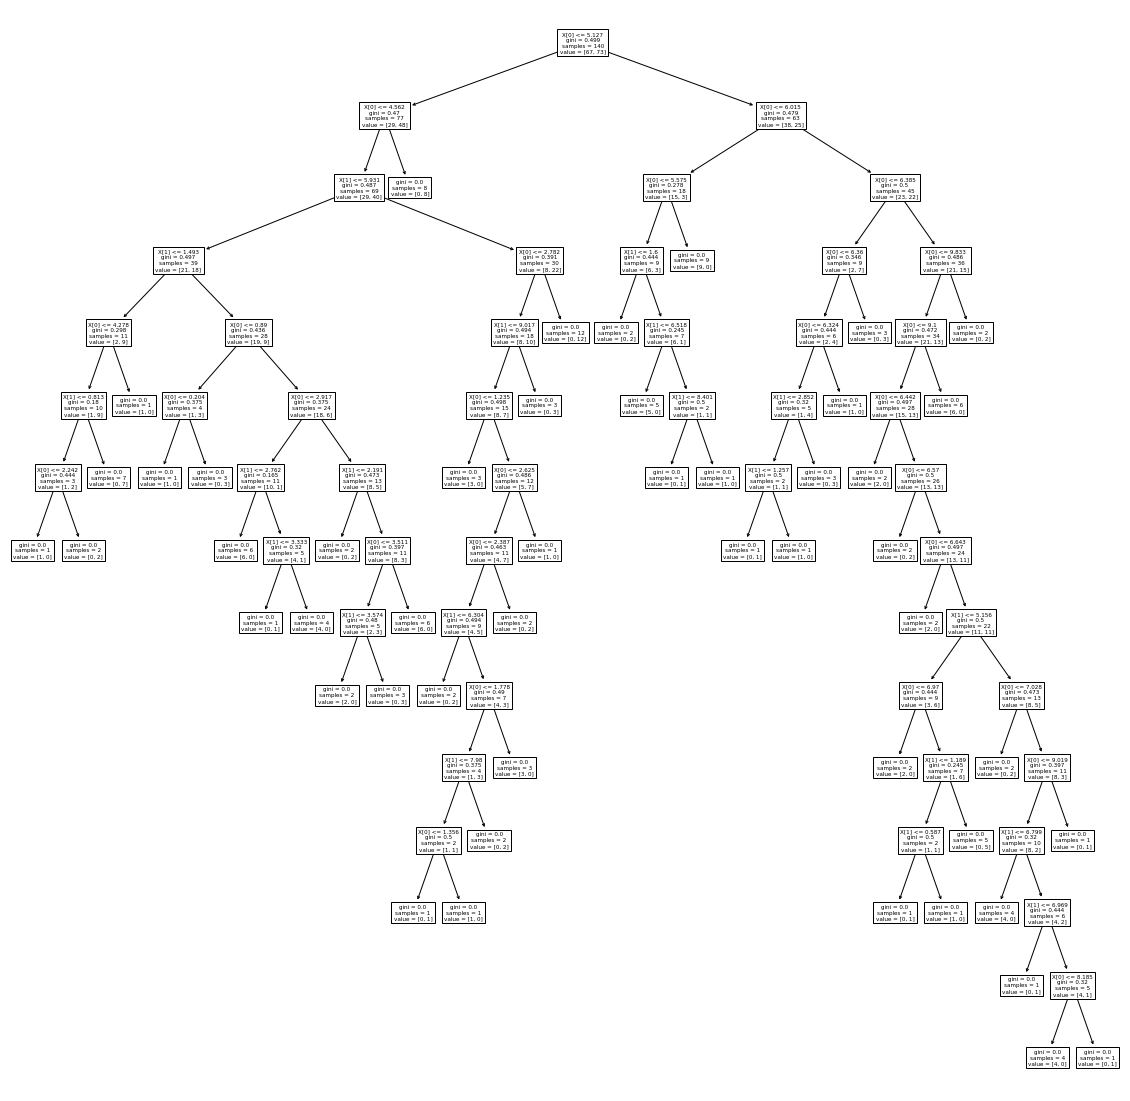

In [309]:
# For Task 3/4 Sample size 50 and max_depth 5
max_depth_clf, clf = get_clf_with_res_and_without(200,5)

print(f"max_depth_with_restriction {max_depth_clf.tree_.max_depth}")
plt.figure(figsize=(20,20))
tree.plot_tree(max_depth_clf)

print(f"max_depth_without_restriction {clf.tree_.max_depth}")
plt.figure(figsize=(20,20))
tree.plot_tree(clf)



1.   How does the accuracy change depending on the number of data?

*   The higher the number of samples, the closer you get to the accuracy of 0.5


2.   Create a seperate dataset for training and testing, what is the difference between training and test accuracy? Why is it different?

*   We are overfitting on training set. 100% training accuracy.


3.  Restrict the depth of the decision tree, what changes?

*  Using the max_depth argument, we achieved the almnost the same accuracy with only a depth of 5 isntead of 26. (number of samples 1000)


4.  Have a closer look on the decisions in a tree. Explain the results. (Note: You can increase the size of the plotted tree using this line of code)

*   Both trees have the same decisions until the max_depth.






### Exercise 6 - Condition monitoring of hydraulic systems sata set

Source: https://archive.ics.uci.edu/ml/datasets/Condition+monitoring+of+hydraulic+systems

* Load the dataset and use a DecisionTree to classify it. 
* Make sure you are using a test- and train-split.
* Try to predict the different type of faults using decision trees. 
* Explain what attributes the trees select.


#### Data Set Information:

The data set was experimentally obtained with a hydraulic test rig. This test rig consists of a primary working and a secondary cooling-filtration circuit which are connected via the oil tank [1], [2]. The system cyclically repeats constant load cycles (duration 60 seconds) and measures process values such as pressures, volume flows and temperatures while the condition of four hydraulic components (cooler, valve, pump and accumulator) is quantitatively varied.


#### Attribute Information:

The data set was experimentally obtained with a hydraulic test rig. This test rig consists of a primary working and a secondary cooling-filtration circuit which are connected via the oil tank [1], [2]. The system cyclically repeats constant load cycles (duration 60 seconds) and measures process values such as pressures, volume flows and temperatures while the condition of four hydraulic components (cooler, valve, pump and accumulator) is quantitatively varied.

**Attributes are:**
```
Attribute   Sensor	    Physical quantity		        Unit	    Sampling rate
X[0]           PS1		Pressure			bar		100 Hz
X[1]           PS2		Pressure			bar		100 Hz
X[2]           PS3		Pressure			bar		100 Hz
X[3]           PS4		Pressure			bar		100 Hz
X[4]           PS5		Pressure			bar		100 Hz
X[5]           PS6		Pressure			bar		100 Hz
X[6]           EPS1             Motor power			W		100 Hz
X[7]           FS1		Volume flow			l/min		10 Hz
X[8]           FS2		Volume flow			l/min		10 Hz
X[9]           TS1		Temperature			Â°C		1 Hz
X[10]          TS2		Temperature			Â°C		1 Hz
X[11]          TS3		Temperature			Â°C		1 Hz
X[12]          TS4		Temperature			Â°C		1 Hz
X[13]          VS1		Vibration			mm/s		1 Hz
X[14]          CE		Cooling efficiency (virtual)	%		1 Hz
X[15]          CP		Cooling power (virtual)		kW		1 Hz
X[16]          SE		Efficiency factor		%		1 Hz
```

The target conditions are:

**1: Cooler condition / %:***
* 3: close to total failure
* 20: reduced effifiency
* 100: full efficiency

**2: Valve condition / %:**
* 100: optimal switching behavior
* 90: small lag
* 80: severe lag
* 73: close to total failure

**3: Internal pump leakage:**
* 0: no leakage
* 1: weak leakage
* 2: severe leakage

**4: Hydraulic accumulator / bar:**
* 130: optimal pressure
* 115: slightly reduced pressure
* 100: severely reduced pressure
* 90: close to total failure

    

In [310]:
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/condition_monitoring.pickle -P ../data

import pickle 
import numpy as  np
from dataclasses import dataclass

@dataclass
class Dataset:
    Description: str
    Attributes: list()
    Targets_cooler: list()
    Targets_valve: list()
    Targets_leakage: list()
    Targets_accu: list()
    X: np.array
    Y_cooler: np.array
    Y_valve: np.array    
    Y_leakage: np.array
    Y_accu: np.array

def load_dataset(filename):
    with open(filename, 'rb') as fd:
        dataset = pickle.load(fd)
    return dataset

data = load_dataset('../data/condition_monitoring.pickle')


--2023-01-05 13:39:15--  https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/condition_monitoring.pickle
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/condition_monitoring.pickle [following]
--2023-01-05 13:39:15--  https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/condition_monitoring.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 371916 (363K) [application/octet-stream]
Saving to: ‘../data/condition_monitoring.pickle.1’

condition_monitorin 100%[===================>] 363.20K  --.-KB/s    in 0.005s  

2023-01-05 1

0.9984894259818731


[Text(0.4, 0.8333333333333334, 'X[14] <= 22.247\ngini = 0.667\nsamples = 1543\nvalue = [520, 503, 520]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 519\nvalue = [519, 0, 0]'),
 Text(0.6, 0.5, 'X[12] <= 38.972\ngini = 0.501\nsamples = 1024\nvalue = [1, 503, 520]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.004\nsamples = 521\nvalue = [1, 0, 520]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 503\nvalue = [0, 503, 0]')]

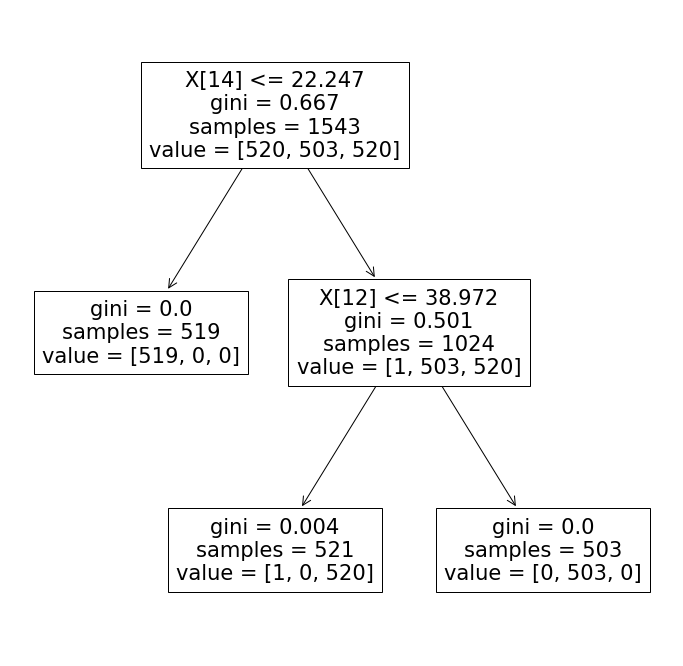

In [311]:
# COOLER
X_train, X_test,Y_train, Y_test = train_test_split(data.X, data.Y_cooler, test_size=0.3)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, Y_train)
yhat = clf.predict(X_test)
print(accuracy_score(yhat, Y_test))
plt.figure(figsize=(12,12))
tree.plot_tree(clf)


0.6344410876132931


[Text(0.4609375, 0.9166666666666666, 'X[16] <= 58.818\ngini = 0.654\nsamples = 1543\nvalue = [243, 254, 246, 800]'),
 Text(0.28125, 0.75, 'X[5] <= 9.827\ngini = 0.747\nsamples = 788\nvalue = [211, 197, 162, 218]'),
 Text(0.25, 0.5833333333333334, 'X[7] <= 6.537\ngini = 0.748\nsamples = 764\nvalue = [211, 197, 162, 194]'),
 Text(0.125, 0.4166666666666667, 'X[16] <= 56.912\ngini = 0.749\nsamples = 689\nvalue = [165, 176, 162, 186]'),
 Text(0.0625, 0.25, 'X[1] <= 108.85\ngini = 0.74\nsamples = 512\nvalue = [163, 141, 99, 109]'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.66\nsamples = 247\nvalue = [123, 59, 30, 35]'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.736\nsamples = 265\nvalue = [40, 82, 69, 74]'),
 Text(0.1875, 0.25, 'X[1] <= 109.287\ngini = 0.645\nsamples = 177\nvalue = [2, 35, 63, 77]'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.658\nsamples = 149\nvalue = [2, 35, 63, 49]'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28]'),
 Text

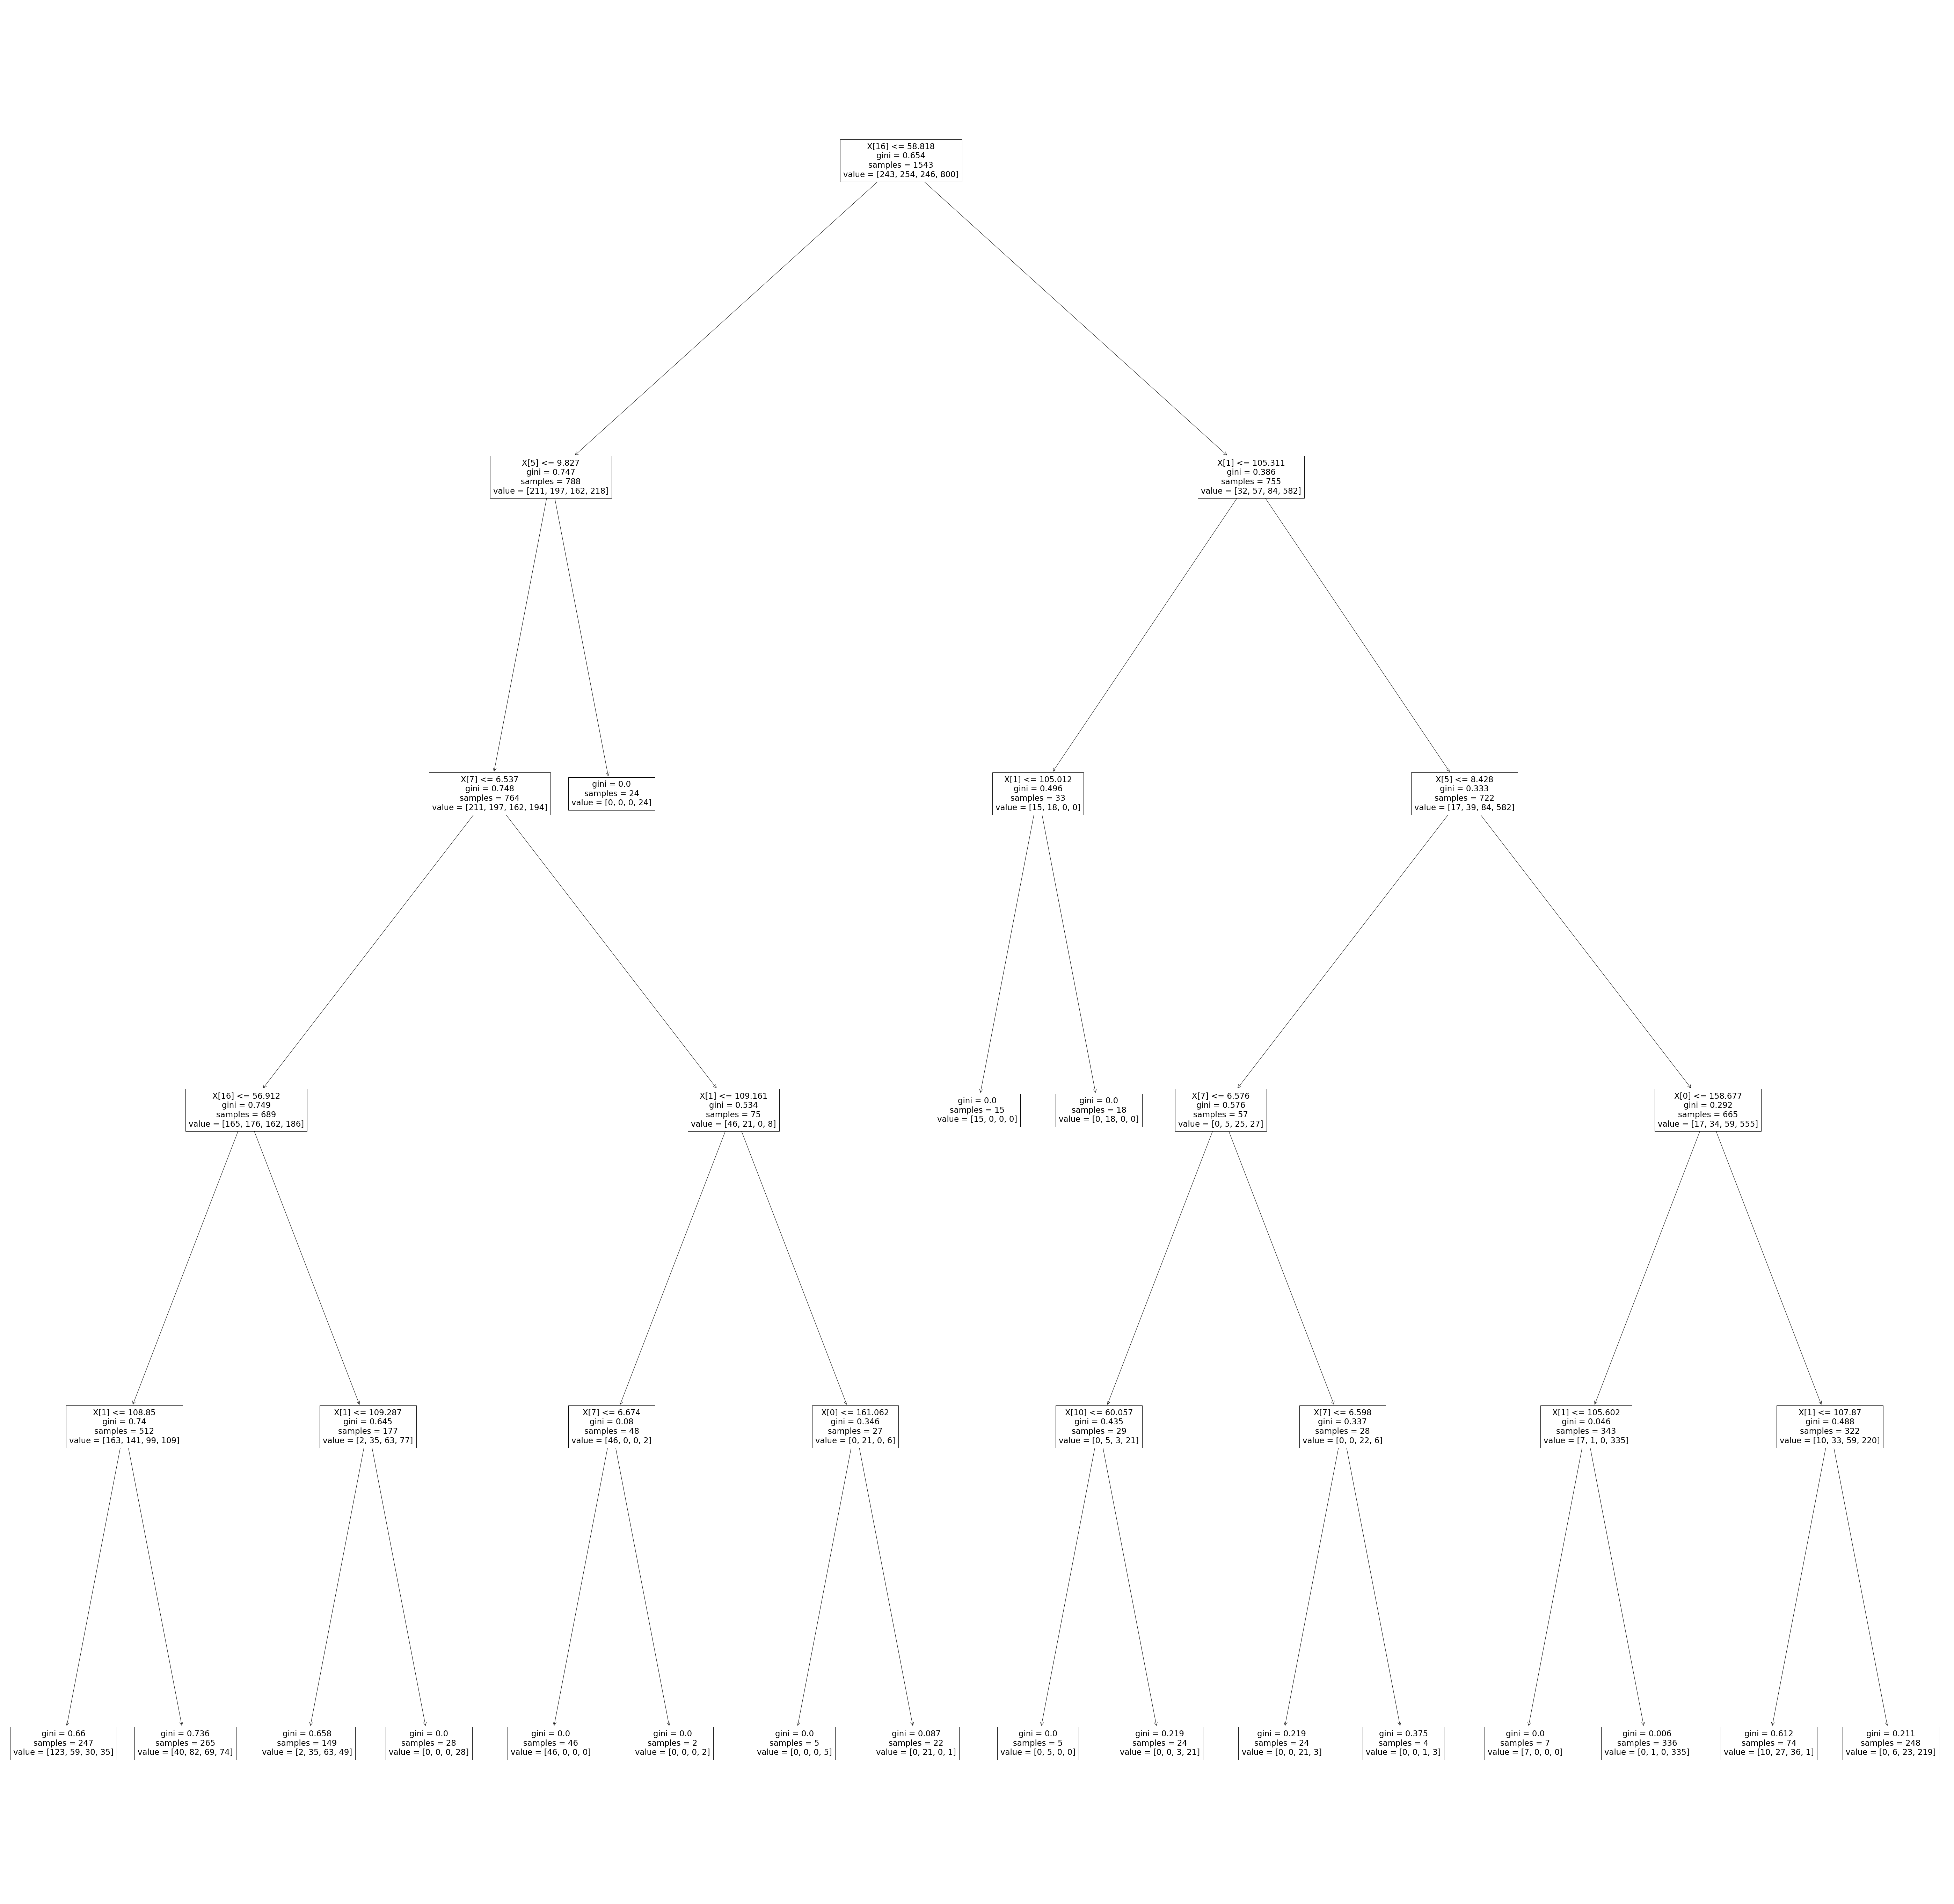

In [312]:
# VALVE
X_train, X_test,Y_train, Y_test = train_test_split(data.X, data.Y_valve, test_size=0.3)
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, Y_train)
yhat = clf.predict(X_test)
print(accuracy_score(yhat, Y_test))
plt.figure(figsize=(100,100))
tree.plot_tree(clf)

0.9712990936555891


[Text(0.7102272727272727, 0.9166666666666666, 'X[16] <= 58.068\ngini = 0.594\nsamples = 1543\nvalue = [854, 343, 346]'),
 Text(0.5113636363636364, 0.75, 'X[7] <= 6.433\ngini = 0.521\nsamples = 702\nvalue = [15, 341, 346]'),
 Text(0.25, 0.5833333333333334, 'X[10] <= 58.883\ngini = 0.429\nsamples = 488\nvalue = [10, 135, 343]'),
 Text(0.09090909090909091, 0.4166666666666667, 'X[7] <= 6.409\ngini = 0.147\nsamples = 287\nvalue = [0, 23, 264]'),
 Text(0.045454545454545456, 0.25, 'gini = 0.0\nsamples = 222\nvalue = [0, 0, 222]'),
 Text(0.13636363636363635, 0.25, 'X[1] <= 108.023\ngini = 0.457\nsamples = 65\nvalue = [0, 23, 42]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.0\nsamples = 42\nvalue = [0, 0, 42]'),
 Text(0.4090909090909091, 0.4166666666666667, 'X[7] <= 3.294\ngini = 0.533\nsamples = 201\nvalue = [10, 112, 79]'),
 Text(0.3181818181818182, 0.25, 'X[6] <= 2615.883\ngini = 

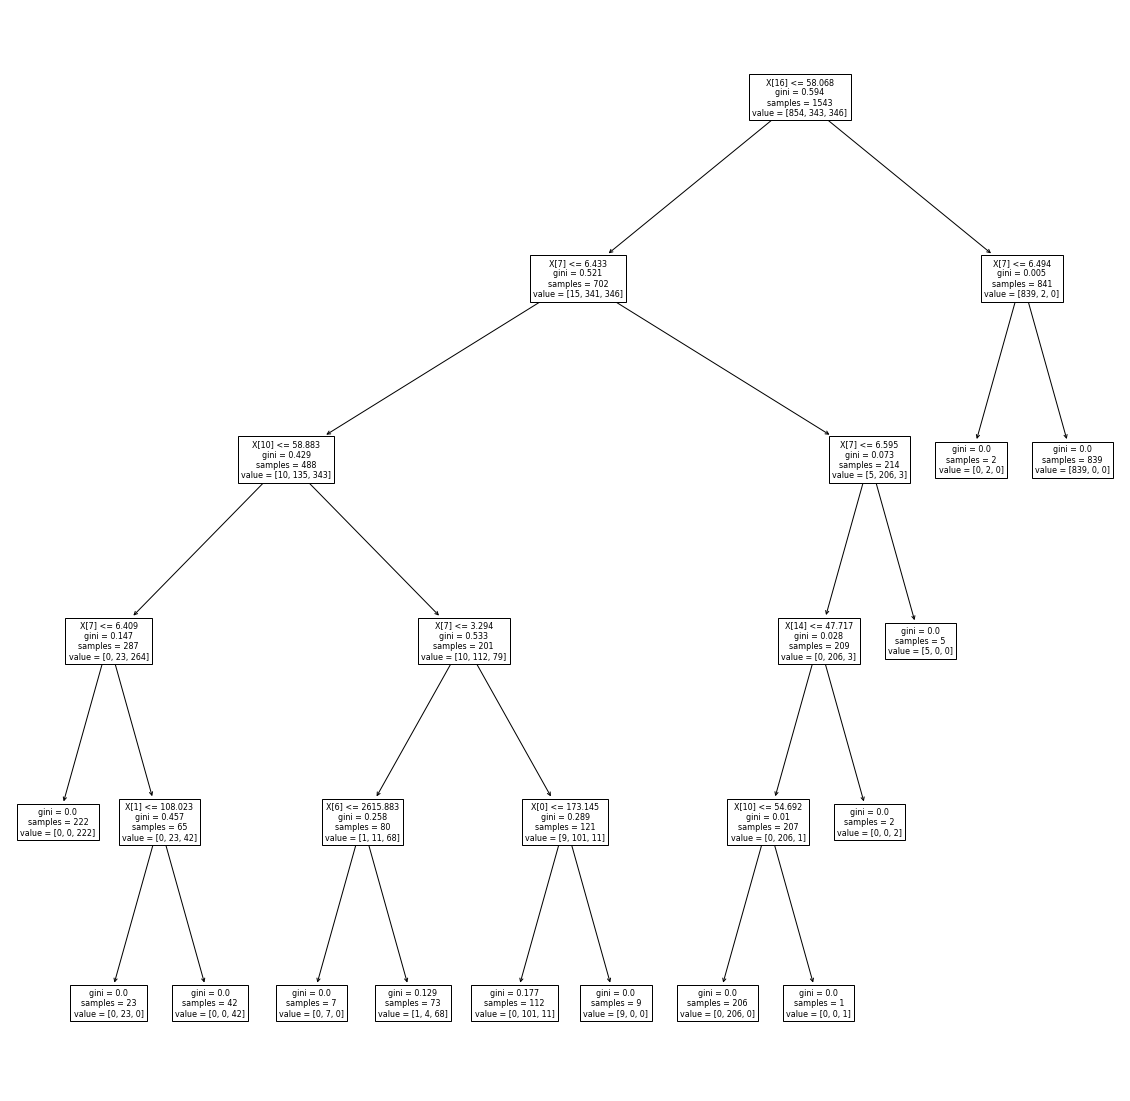

In [313]:
# LEAKAGE
X_train, X_test,Y_train, Y_test = train_test_split(data.X, data.Y_leakage, test_size=0.3)
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, Y_train)
yhat = clf.predict(X_test)
print(accuracy_score(yhat, Y_test))
plt.figure(figsize=(20,20))
tree.plot_tree(clf)

0.7175226586102719


[Text(0.7137096774193549, 0.9166666666666666, 'X[16] <= 60.183\ngini = 0.726\nsamples = 1543\nvalue = [564, 277, 280, 422]'),
 Text(0.49193548387096775, 0.75, 'X[5] <= 9.769\ngini = 0.719\nsamples = 1396\nvalue = [563, 275, 280, 278]'),
 Text(0.25806451612903225, 0.5833333333333334, 'X[6] <= 2472.494\ngini = 0.745\nsamples = 1135\nvalue = [345, 275, 280, 235]'),
 Text(0.12903225806451613, 0.4166666666666667, 'X[13] <= 0.618\ngini = 0.684\nsamples = 568\nvalue = [249, 63, 88, 168]'),
 Text(0.06451612903225806, 0.25, 'X[8] <= 9.617\ngini = 0.529\nsamples = 303\nvalue = [199, 35, 39, 30]'),
 Text(0.03225806451612903, 0.08333333333333333, 'gini = 0.0\nsamples = 134\nvalue = [134, 0, 0, 0]'),
 Text(0.0967741935483871, 0.08333333333333333, 'gini = 0.724\nsamples = 169\nvalue = [65, 35, 39, 30]'),
 Text(0.1935483870967742, 0.25, 'X[9] <= 55.36\ngini = 0.648\nsamples = 265\nvalue = [50, 28, 49, 138]'),
 Text(0.16129032258064516, 0.08333333333333333, 'gini = 0.331\nsamples = 171\nvalue = [15, 1

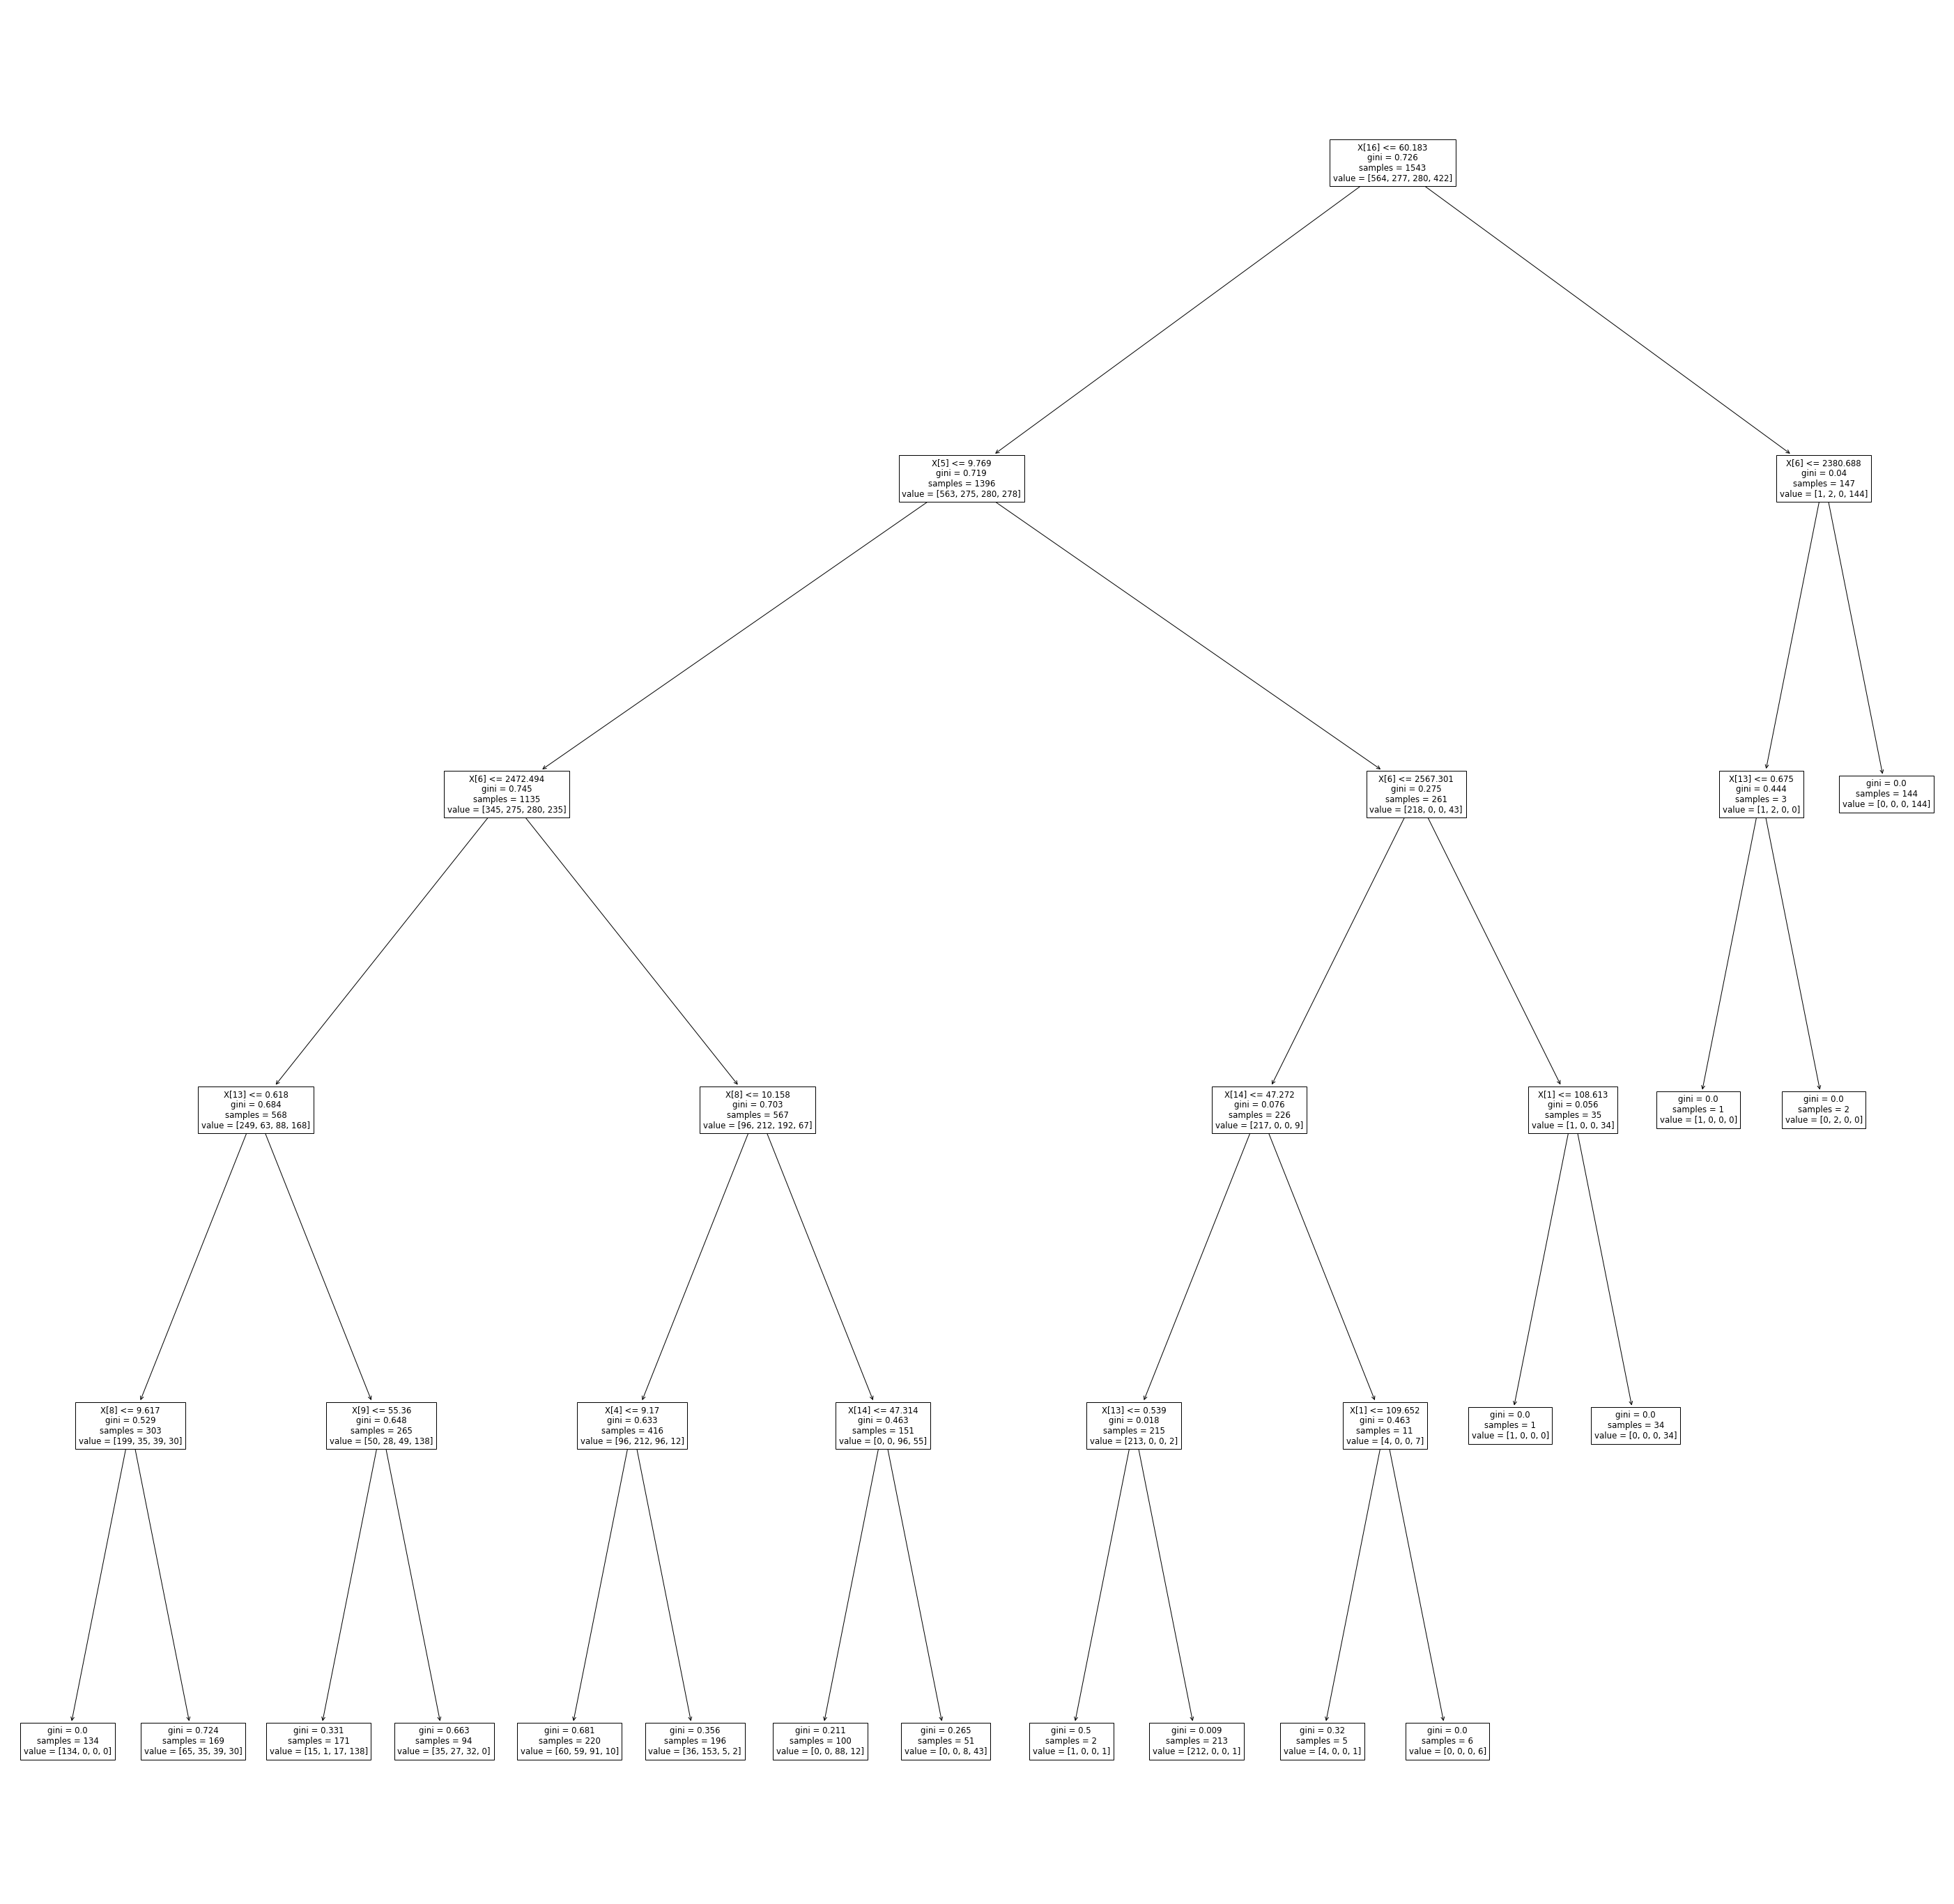

In [314]:
# ACCU
X_train, X_test,Y_train, Y_test = train_test_split(data.X, data.Y_accu, test_size=0.3)
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, Y_train)
yhat = clf.predict(X_test)
print(accuracy_score(yhat, Y_test))
plt.figure(figsize=(50,50))
tree.plot_tree(clf)

## Explain what attributes the trees select.

Physical quantities of the most important (popular) Attributes after running multiple times




**Cooler**

*   Cooling power (virtual)

*   Cooling efficiency (virtual)



**Valve**

*   Efficiency factor

*   Pressure



**Leakage**

*   Efficiency factor

*   Volume flow

*   Temperature


**Accumulator**

*   Efficiency factor

*   Pressure

*   Volume flow

*   Motor power

*   Temperature
